<header style="background-color: #fff; position: fixed; width: 100%; z-index: 1; top: -10px;"><p><br></p>
           <p   style="color: #17318F;font-family:Lucida Sans Unicode, Lucida Grande, sans-serif;font-size:32px" align="center"> Métodos de clasificación supervisada - Árboles de decisión
 <a href='https://izainea.github.io'><img src="https://raw.githubusercontent.com/Izainea/Izainea.github.io/master/logos%20IZ-13.png" alt="izainea" style="margin: 10px;  float: right; width: 150px;" ></a></p> 
<p><br></p>
</header>


# ¿Qué son?
Este es un tipo de algoritmo que progresivamente divide el conjunto de datos acordes a una característica descriptiva, lo hace hasta que cada conjunto es descrito por una etiqueta. Son muy utilizados en el ámbito del aprendizaje supervisado y de regresión, dependendiendo del tipo de la variable objetivo. Es quizás uno de los algoritmos de machine learning más usados dado que es uno de los algoritmos que brindan una fácil interpretación y resultan ser muy útiles en diferentes campos, como por ejemplo:

- Chatbots
- Análisis de sentimientos
- Detección de fraudes
- Entre otros...

![img](../images/DecisionTree.png)

El árbol se construye de arriba hacia abajo tratando de agrupar las observaciones similares entre sí y estableciendo reglas que máximicen la homogeneidad de los datos agrupados y heterogeneidad de los grupos diferentes. Cada hoja indica un tipo particular de datos, en el caso de variables continuas es útil particionar la variable por intervalos. El siguiente esquema explica como entender dichas particiones:

Tomado de ([opendatascience.com](https://opendatascience.com/the-complete-guide-to-decision-trees-part-1/))

<img loading="lazy" class="progressiveMedia-image js-progressiveMedia-image alignnone" src="https://cdn-images-1.medium.com/max/1000/0*cant-HQdfMju-GxG" alt="" width="500" height="250" data-src="https://cdn-images-1.medium.com/max/1000/0*cant-HQdfMju-GxG">

La complejidad de los árboles debe ser controlada, evitando problemas de sobreajuste y dificultades de interpretación, un método común que implementa el algoritmo para evitar este problema es la poda. Este proceso omite varios nodos que conforman ramas 'largas' de los árboles optimizando el rendimiento del árbol de decisión.





## Ventajas y desventajas

<i class="fa fa-hand-peace-o" style="font: sans;font-size:48px;color:blue"> Ventajas</i>

* Fácil de entender.
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado).
* El tipo de datos no es una restricción.
* Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador).

<i class="fa fa-hand-stop-o" style="font:sans;font-size:48px;color:red"> Desventajas</i>

* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

## Algoritmos usados en [sklearn](https://scikit-learn.org/stable/modules/tree.html)

* ID3 (dicotomizador iterativo 3) fue desarrollado en 1986 por Ross Quinlan. El algoritmo crea un árbol de múltiples vías, encontrando para cada nodo (es decir, de manera codiciosa) la característica categórica que producirá la mayor ganancia de información para los objetivos categóricos. Los árboles crecen hasta su tamaño máximo y luego se suele aplicar un paso de poda para mejorar la capacidad del árbol de generalizar a datos invisibles.

* C4.5 es el sucesor de ID3 y eliminó la restricción de que las características deben ser categóricas definiendo dinámicamente un atributo discreto (basado en variables numéricas) que divide el valor del atributo continuo en un conjunto discreto de intervalos. C4.5 convierte los árboles entrenados (es decir, la salida del algoritmo ID3) en conjuntos de reglas si-entonces. Luego, se evalúa la precisión de cada regla para determinar el orden en el que deben aplicarse. La poda se realiza eliminando la condición previa de una regla si la precisión de la regla mejora sin ella.

* C5.0 es la última versión de Quinlan bajo licencia propietaria. Utiliza menos memoria y crea conjuntos de reglas más pequeños que C4.5 a la vez que es más preciso.

* CART (árboles de clasificación y regresión) es muy similar a C4.5, pero se diferencia en que admite variables objetivo numéricas (regresión) y no calcula conjuntos de reglas. CART construye árboles binarios utilizando la característica y el umbral que producen la mayor ganancia de información en cada nodo.

scikit-learn usa una versión optimizada del algoritmo CART; sin embargo, la implementación de scikit-learn no admite variables categóricas por ahora.



## Ejemplo

Los árboles de decisión permiten parámetyros como  min_samples_leaf y max_depth para prevenir un árbol sobreajustado, además el costo de complejidad de la poda proporciona otra opción para controlar el tamaño de un árbol. En `DecisionTreeClassifier` la complejidad hace referencia a ccp_alpha. Mayores valores de ccp_alpha aumentan el número de nudos podados. Aquí solo mostramos el efecto de ccp_alpha al regularizar los árboles y cómo elegir un ccp_alpha basado en puntajes de validación.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd

In [2]:
X, y = load_breast_cancer(return_X_y=True)
DF=pd.DataFrame(X,columns=load_breast_cancer()['feature_names'])
DF['target']=y
DF


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Impureza de hojas vs podas eficientes

El costo mínimo de la complejidad de la poda aplica de forma recursiva el nodo con el "eslabón más débil". El eslabón más débil se caracteriza por un alfa efectivo, donde los nodos con el alfa efectivo más pequeño se podan primero. Para tener una idea de qué valores de ccp_alpha podrían ser apropiados, scikit-learn proporciona DecisionTreeClassifier.cost_complexity_pruning_path que devuelve los alfas efectivos y las impurezas totales de las hojas correspondientes en cada paso del proceso de poda. A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que aumenta la impureza total de sus hojas.

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

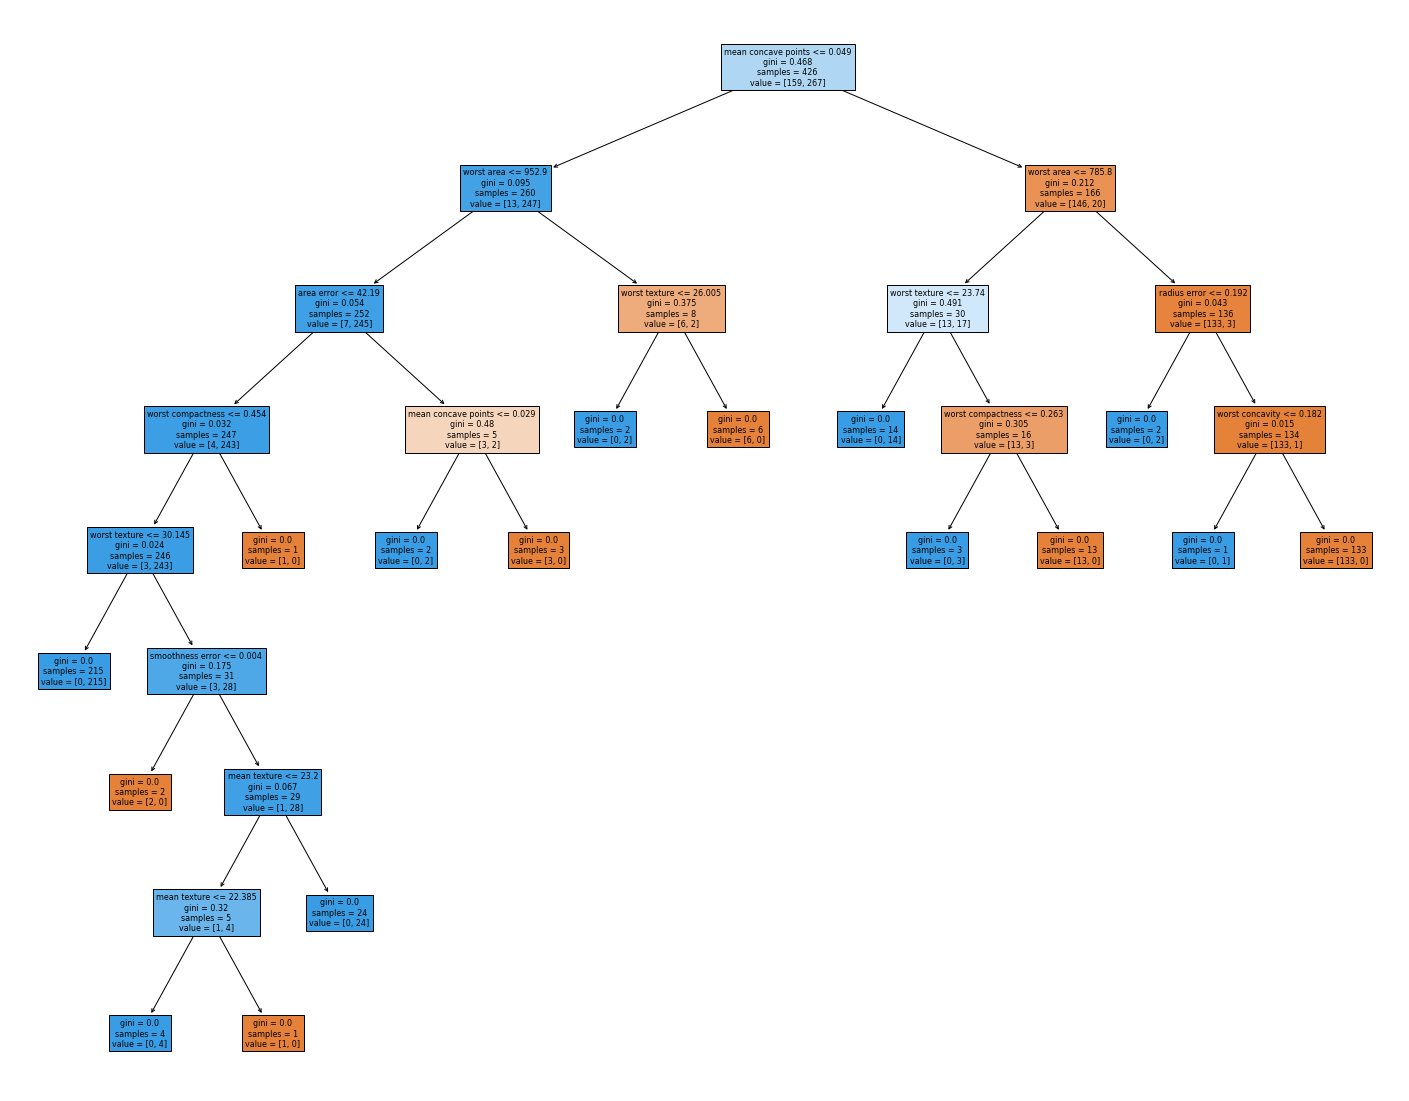

In [7]:
fig = plt.figure(figsize=(25,20))
_=plot_tree(clf, 
                   feature_names=load_breast_cancer()['feature_names'],
                   filled=True)


In [24]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

En la siguiente gráfica, se elimina el valor alfa efectivo máximo, porque es el árbol trivial con un solo nodo.


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

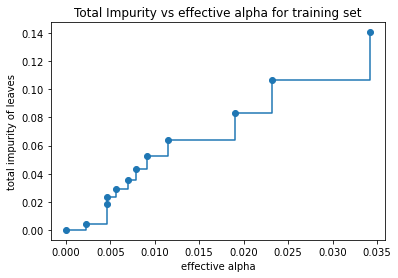

In [25]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

A continuación, entrenamos un árbol de decisiones utilizando los alfas efectivos. El último valor en ccp_alphases el valor alfa que poda todo el árbol, dejando el árbol clfs[-1], con un nodo.

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    #fig = plt.figure(figsize=(25,20))
    
    #print('valor de ccp_alpha',ccp_alpha)
    #fig1 = plot_tree(clf, 
                  # feature_names=load_breast_cancer()['feature_names'],
                 # filled=True)
    

Para el resto de este ejemplo, eliminamos el último elemento en clfs y ccp_alphas, porque es el árbol trivial con un solo nodo. Aquí mostramos que el número de nodos y la profundidad del árbol disminuye a medida que aumenta el alfa.

In [27]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

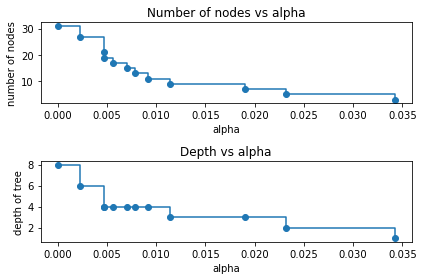

In [30]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy

Cuando ccp_alpha se establece en cero y se mantienen los otros parámetros predeterminados de DecisionTreeClassifier, el árbol se sobreajusta, lo que lleva a una precisión de entrenamiento del 100% y una precisión de prueba del 88%. A medida que aumenta el alfa, se poda una mayor parte del árbol, creando así un árbol de decisiones que se generaliza mejor. En este ejemplo, la configuración ccp_alpha=0.015 maximiza la precisión de la prueba.

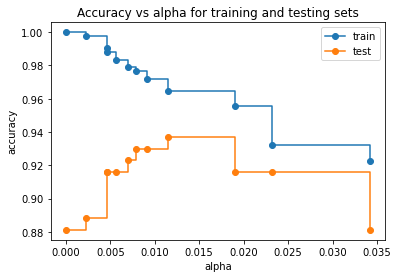

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()